## Meshgrid and contourf

#### Authors:
      • Yannis Mageiras
      • Marina Koukouvaou

#### Date:
      • 28/11/2022 (latest update)

In [25]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
iris = load_iris()

In [9]:
df_xvalues = pd.DataFrame(data=iris.data , columns=iris.feature_names)
df_truth = pd.DataFrame(data=iris.target,columns=["truth"])

In [10]:
X_iris = df_xvalues

y_iris =df_truth


In [30]:
from datetime import datetime as dt
from sklearn.metrics import accuracy_score
clf = xgb.XGBClassifier(objective='multi:softmax',num_class=3, learning_rate=0.1,
                            max_depth=5, eval_metric='mlogloss', n_estimators=300,
                            seed=42, use_label_encoder=False)
start = dt.now()
clf.fit(X_iris, y_iris)
running_secs = (dt.now() - start).seconds
ypred_xgboost = clf.predict(X_iris)   ## Making predictions on the training data


print(f"----The model is trained in running time = {running_secs:.2f} seconds and with an accuracy of {accuracy_score(ypred_xgboost,y_iris)*100}")

----The model is trained in running time = 0.00 seconds and with an accuracy of 100.0


### Explain how the meshgrid and contourf works

##### First we have to create artificial data and let the model make predictions on those points. We can do this using the linspace in combination with the meshgrid fucntions

Text(0,0.5,'sepal width(cm)')

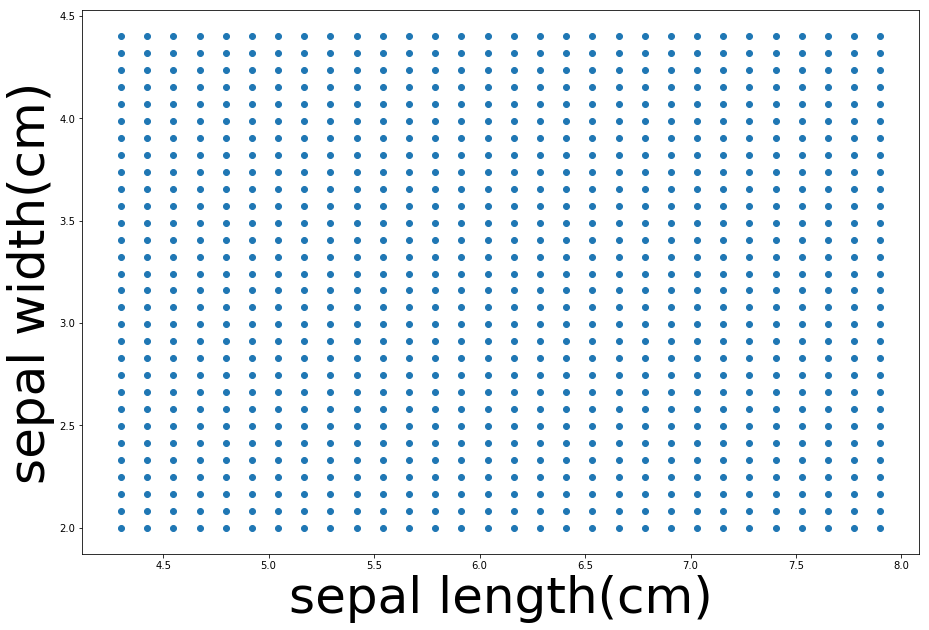

In [13]:
xx1, yy1 = np.meshgrid(np.linspace(X_iris["sepal length (cm)"].min(), X_iris["sepal length (cm)"].max(), 30), 
                       np.linspace(X_iris["sepal width (cm)"].min(), X_iris["sepal width (cm)"].max(), 30))

plt.figure(figsize=(15,10))
plt.scatter(xx1,yy1)
plt.xlabel("sepal length(cm)", fontsize=50)
plt.ylabel("sepal width(cm)", fontsize=50)

#### The model, however, is trained on 4 features - sepal length, sepal width, petal length, petal width- and in that specific order. So we need to create artificial data for all those features and then concatenate them into one table in order for the model to make predictions

Text(0,0.5,'petal width(cm)')

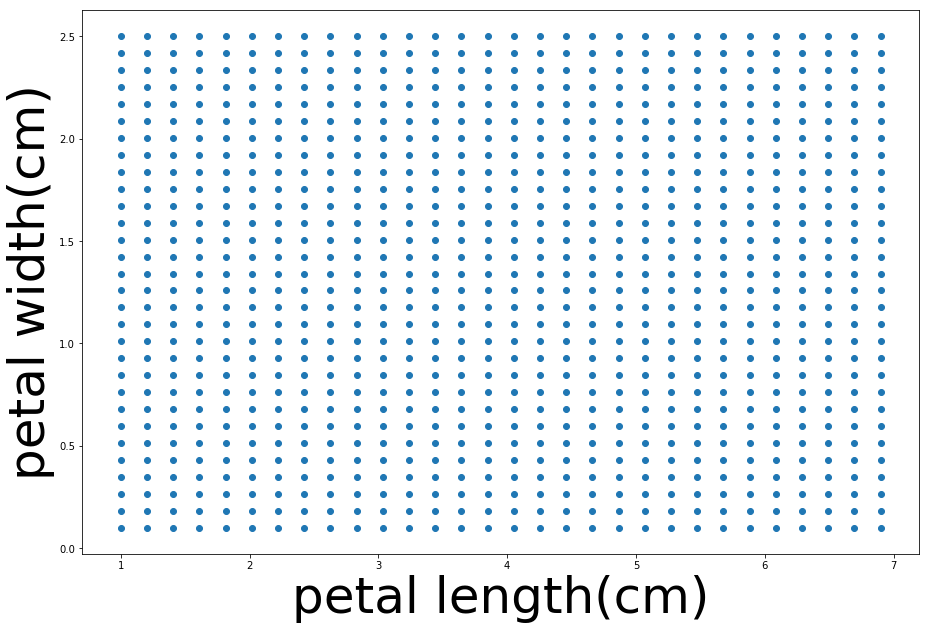

In [15]:
xx2, yy2 = np.meshgrid(np.linspace(X_iris["petal length (cm)"].min(), X_iris["petal length (cm)"].max(), 30), 
                       np.linspace(X_iris["petal width (cm)"].min(), X_iris["petal width (cm)"].max(), 30))

plt.figure(figsize=(15,10))
plt.scatter(xx2,yy2)
plt.xlabel("petal length(cm)", fontsize=50)
plt.ylabel("petal width(cm)", fontsize=50)

 #### The shape of the grid x,y values is not in the right form that we need for the model to make predictions. The ML model requires observations with each one having 4 values (the features). Since we have created 900 points in that meshgrid the final shape should be:
 #### shape of the final artificial grid data (899,4)

In [16]:
print(xx1.shape)
print(yy1.shape)

(30, 30)
(30, 30)


We have to transform these into (899,2). First we can flatten the array using the np.ravel function

In [17]:
xx1rav = xx1.ravel()  ## we have flattened the 900 artificial values of the petal_length
print("The size of the new flat artificial points for the petal_length is",xx1rav.shape)

The size of the new flat artificial points for the petal_length is (900,)


In [18]:
yy1rav = yy1.ravel()  ## we have flattened the 900 artificial values of the petal_width
print("The size of the new flat artificial points for the petal_width is",yy1rav.shape)

The size of the new flat artificial points for the petal_width is (900,)


In [19]:
xx1rav = xx1rav.reshape((900,1))
yy1rav = yy1rav.reshape((900,1))

In [20]:
test = np.concatenate([xx1rav,yy1rav],axis=1)

In [21]:
test = pd.DataFrame(test)
test

,0,1
0,4.300000,2.0
1,4.424138,2.0
2,4.548276,2.0
3,4.672414,2.0
4,4.796552,2.0
...,...,...
895,7.403448,4.4
896,7.527586,4.4
897,7.651724,4.4
898,7.775862,4.4


### If we don't want to use the np.concatenate there is another way by using np.c_ function where it stacks 1D arrays as columns into a 2D array

In [22]:
test2 = np.c_[xx1.ravel(),yy1.ravel(),xx2.ravel(),yy2.ravel()]
test2 =pd.DataFrame(test2)
test2

,0,1,2,3
0,4.300000,2.0,1.000000,0.1
1,4.424138,2.0,1.203448,0.1
2,4.548276,2.0,1.406897,0.1
3,4.672414,2.0,1.610345,0.1
4,4.796552,2.0,1.813793,0.1
...,...,...,...,...
895,7.403448,4.4,6.086207,2.5
896,7.527586,4.4,6.289655,2.5
897,7.651724,4.4,6.493103,2.5
898,7.775862,4.4,6.696552,2.5


In [35]:
y_artificial = clf.predict(test2)

y_artificial=y_artificial.reshape((30,30))

## Plotting the iris data on top of the contourf plot

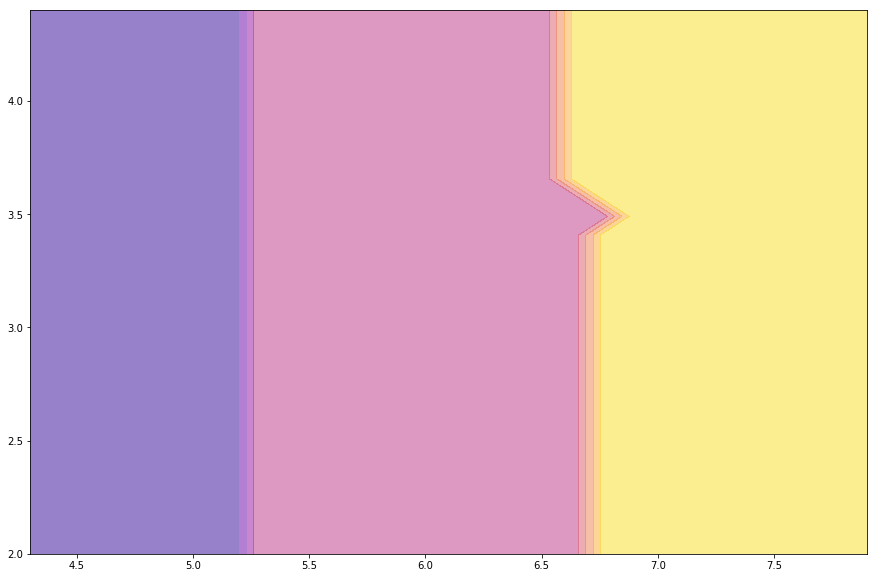

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.rcParams.update({'figure.figsize':(15,10)})
ax.contourf(xx1, yy1, y_artificial, cmap='plasma', alpha=0.5) # coloured by class

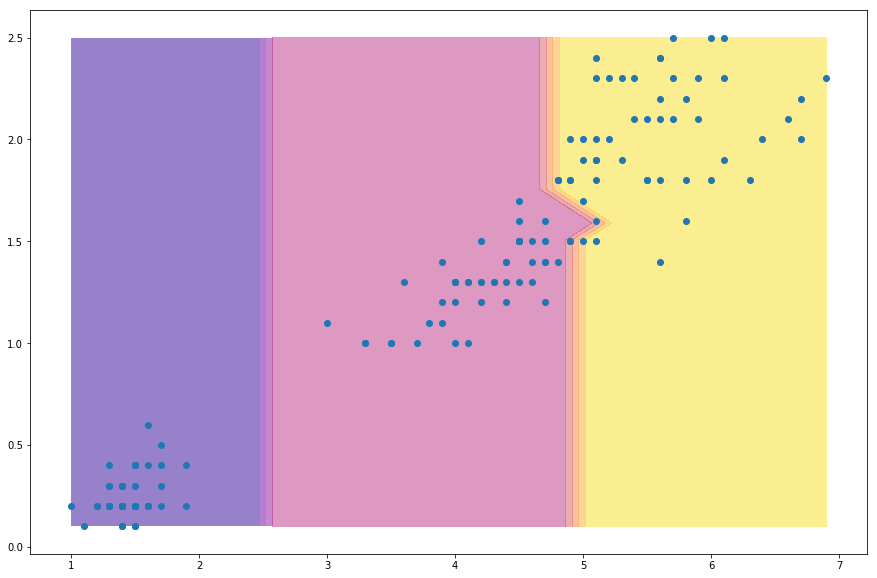

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.rcParams.update({'figure.figsize':(15,10)})
ax.contourf(xx2, yy2, y_artificial, cmap='plasma', alpha=0.5) # coloured by class
ax.scatter(X_iris["petal length (cm)"],X_iris["petal width (cm)"])

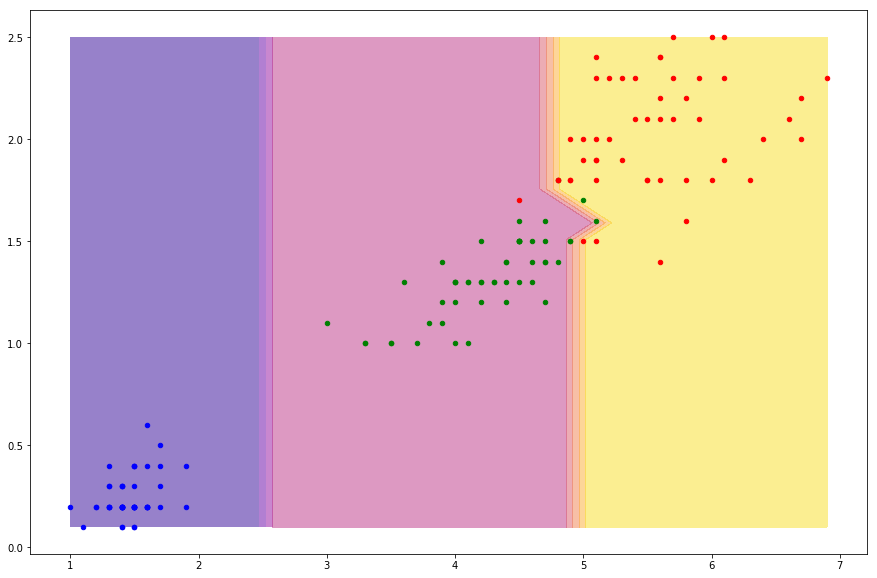

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.rcParams.update({'figure.figsize':(15,10)})
ax.contourf(xx2, yy2, y_artificial, cmap='plasma', alpha=0.5) # coloured by class
ax.scatter(X_iris["petal length (cm)"][y_iris["truth"]==0], X_iris["petal width (cm)"][y_iris["truth"]==0], s=20, c='b')
ax.scatter(X_iris["petal length (cm)"][y_iris["truth"]==1], X_iris["petal width (cm)"][y_iris["truth"]==1], s=20, c='g')
ax.scatter(X_iris["petal length (cm)"][y_iris["truth"]==2], X_iris["petal width (cm)"][y_iris["truth"]==2], s=20, c='r')